# DATA PREPARATION

In [ ]:
#!pip install tensorflow

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# built training and test sets from 3's and 7's
x_train_3 = x_train[y_train==3]
x_train_7 = x_train[y_train==7]

# assign label 0 to 3's and label 1 to 7's
x_train = np.concatenate([x_train_3, x_train_7])
y_train = np.concatenate(
    [np.zeros(x_train_3.shape[0]), np.ones(x_train_7.shape[0])]
    )

# same for the test sets
x_test_3 = x_test[y_test==3]
x_test_7 = x_test[y_test==7]
x_test = np.concatenate([x_test_3, x_test_7])
y_test = np.concatenate(
    [np.zeros(x_test_3.shape[0]), np.ones(x_test_7.shape[0])]
    )

label = 0.0


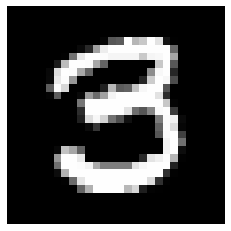

In [ ]:
# visualize a random training element
N = x_train.shape[0]
idx = np.random.randint(N)
plt.imshow(x_train[idx], cmap='Greys_r')
plt.axis('off')
print(f'label = {y_train[idx]}')

Traning and test sets are tensors of dimensions $(N, n, n)$ ($N$ matrices of size $n\times n$, each matrix representing an image). To train the algorithms we need to flatten the images into 1-dim vectors.

In [ ]:
# check dimensions
x_train.shape, x_test.shape

((12396, 28, 28), (2038, 28, 28))

Recast these sets in matrices of size $(N \times n^2)$

In [ ]:
# Recast training and test sets in matrices of size N x n^2
d = 28**2
x_train = x_train.reshape(-1, d)
x_test = x_test.reshape(-1, d)

In [ ]:
# check dimensions
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(12396, 784) (2038, 784)
(12396,) (2038,)


In [ ]:
# last thing to do, reescale
x_train = x_train / np.max(x_train, axis=1).reshape(-1, 1)
x_test = x_test / np.max(x_test, axis=1).reshape(-1, 1)

# 1) Gradient Descent

In [ ]:
def E_value(x_values,y_values):
  y_pred = sigmoid( x_values @ w )
  E_val = -np.sum(y_values*np.log(y_pred) + (1-y_values)*np.log(1-y_pred))/x_values.shape[0]
  return y_pred, E_val

def sigmoid(x):
  return 1/(1+np.exp(x))

def E_value_wd(x_values,y_values):
  y_pred = sigmoid( x_values @ w )
  E_val = -np.sum(y_values*np.log(y_pred) + (1-y_values)*np.log(1-y_pred))/x_values.shape[0] + lamb*sum(w**2)/(2*d)
  return y_pred, E_val

In [ ]:
w_len = x_train.shape[1]
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.5
tik = time.time()

for i in range(10000):
  y_pred, E_val_train = E_value(x_train,y_train)
  E_vals_train.append(E_val_train)

  y_pred_test, E_val_test = E_value(x_test,y_test)
  E_vals_test.append(E_val_test)

  w = w - eta * (- ((y_pred - y_train)@x_train)/x_train.shape[0])

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

execution time: 149.154 seconds 
% incorrectly classified on training set: 0.73%
% incorrectly classified on test set: 1.77% 
E value for training set = 0.025
E value for test set = 0.061


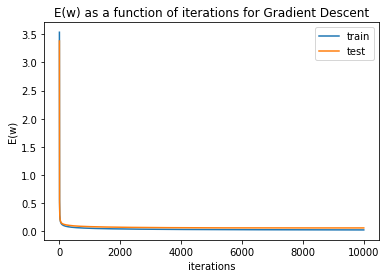

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))

error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}% '.format(100*error_rate))

print('E value for training set = {:.3f}'.format(E_vals_train[-1]))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))


plt.plot([i for i in range(len(E_vals_train))],E_vals_train, label = 'train')
plt.plot([i for i in range(len(E_vals_test))],E_vals_test,label='test')
plt.title('E(w) as a function of iterations for Gradient Descent')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()



## Adding early stopping

In [ ]:
x_train_set, x_train_validation, y_train_set, y_train_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

w_len = x_train_set.shape[1]
np.random.seed(6)
w = np.random.randn(w_len)
E_vals_train = []
E_vals_validation = []
E_vals_test = []
eta = 0.8
E_val_valid = 100000
tik = time.time()

for i in range(10000):  
  E_val_old = E_val_valid
  
  y_pred,E_val_train = E_value(x_train_set,y_train_set)

  y_pred_valid,E_val_valid = E_value(x_train_validation,y_train_validation)

  y_pred_test,E_val_test = E_value(x_test,y_test)

  if E_val_valid > E_val_old:
    break

  else:
    E_vals_train.append(E_val_train)
    E_vals_validation.append(E_val_valid)
    E_vals_test.append(E_val_test)


    grad_E = - ((y_pred - y_train_set)@x_train_set)/x_train_set.shape[0]
    w = w - eta * grad_E

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
y_pred_valid = [round(y_pred_valid[i]) for i in range(len(y_pred_valid))]
timer = time.time()-tik

## Results early stopping

iterations until early stopping: 4714
execution time: 65.288 seconds 

TRAINING DATA:
% incorrectly classified on training set: 0.71%
E value for training set = 0.026

VALIDATION DATA:
% incorrectly classified on validation set: 1.05%
E value for validation set: 0.049

TEST DATA:
% incorrectly classified on test set: 1.72%
E value for test set = 0.063


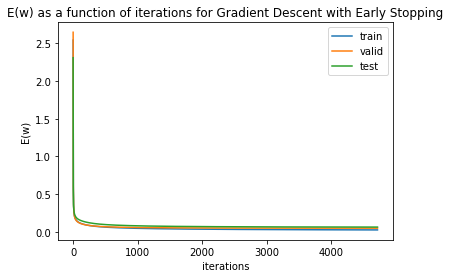

In [ ]:
print('iterations until early stopping: {}'.format(i))

print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train_set)/x_train_set.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('VALIDATION DATA:')
error_rate_validation = 1 - sum(y_pred_valid == y_train_validation)/x_train_validation.shape[0]
print('% incorrectly classified on validation set: {:.2f}%'.format(100*error_rate_validation))
print('E value for validation set: {:.3f}'.format(E_val_valid))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))


plt.plot([i for i in range(len(E_vals_train))],E_vals_train, label = 'train')
plt.plot([i for i in range(len(E_vals_validation))],E_vals_validation, label = 'valid')
plt.plot([i for i in range(len(E_vals_test))],E_vals_test,label='test')
plt.title('E(w) as a function of iterations for Gradient Descent with Early Stopping')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

# 2) Gradient descent with momentum

In [ ]:
w_len = x_train.shape[1]
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.1
alpha = 0.5

for i in range(10000):
  y_pred,E_val_train = E_value(x_train,y_train)
  y_pred_test,E_val_test = E_value(x_test,y_test)

  E_vals_train.append(E_val_train)
  E_vals_test.append(E_val_test)

  grad_E = - ((y_pred - y_train)@x_train)/x_train.shape[0]
  if i == 0:
    dw = - eta * grad_E
    w = w + dw
  else:
    dw = - eta * grad_E + alpha * dw
    w = w + dw

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

execution time: 214.107 seconds 

TRAINING DATA:
% incorrectly classified on training set: 0.99%
E value for training set = 0.033

TEST DATA:
% incorrectly classified on test set: 1.86%
E value for test set = 0.064


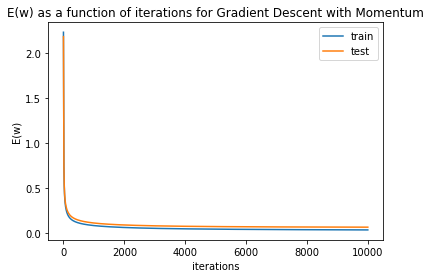

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))


plt.plot([i for i in range(len(E_vals_train))],E_vals_train, label = 'train')
plt.plot([i for i in range(len(E_vals_test))],E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Gradient Descent with Momentum')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

# 3) Gradient descent with weight decay

In [ ]:
w_len = x_train.shape[1]
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.5
alpha = 0.5
lamb = 0.1
d = len(w)
tik = time.time()

for i in range(5340):

  y_pred, E_val_train = E_value_wd(x_train,y_train)
  y_pred_test,E_val_test = E_value_wd(x_test,y_test)

  E_vals_train.append(E_val_train)
  E_vals_test.append(E_val_test)

  grad_E = - ((y_pred - y_train)@x_train)/x_train.shape[0] + lamb*w/d
  if i == 0:
    dw = - eta * grad_E
    w = w + dw
  else:
    dw = - eta * grad_E + alpha * dw
    w = w + dw

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

execution time: 81.407 seconds 

TRAINING DATA:
% incorrectly classified on training set: 0.77%
E value for training set = 0.039

TEST DATA:
% incorrectly classified on test set: 1.77%
E value for test set = 0.062


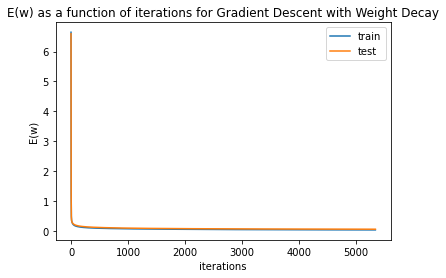

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))

plt.plot(E_vals_train, label = 'train')
plt.plot(E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Gradient Descent with Weight Decay')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

# 4) Newton method

In [ ]:
def E_value_wd(x_values,y_values):
  y_pred = sigmoid( x_values @ w )
  E_val = -np.sum(y_values*np.log(y_pred) + (1-y_values)*np.log(1-y_pred))/x_values.shape[0]  + lamb*sum(w**2)/(2*d)
  return y_pred, E_val

In [ ]:
w_len = x_train.shape[1]
np.random.seed(8)
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.1
alpha = 0.5
lamb = 0.1
d = len(w)
tik = time.time()
runs = 10

for i in range(runs):
  if i%5 == 0:
    print('percentage done: {:.2f}%'.format(100*i/runs))
  y_pred = sigmoid( x_train @ w )
  E_val_train = (-1/x_train.shape[0])*np.sum(y_train*np.log(y_pred) + 
                  (1-y_train)*np.log(1-y_pred))  + lamb*sum(w**2)/(2*d)
  
  E_vals_train.append(E_val_train)

  y_pred_test = sigmoid( x_test @ w )

  E_val_test = (-1/x_test.shape[0])*np.sum(y_test*np.log(y_pred_test) + 
                  (1-y_test)*np.log(1-y_pred_test))  + lamb*sum(w**2)/(2*d)

  E_vals_test.append(E_val_test)

  grad_E = - ((y_pred - y_train)@x_train)/len(y_pred) + (lamb*w)/d
  hess_E = (((y_pred*(1-y_pred)) * x_train.T)@x_train)/len(y_pred) + (lamb/d)*np.identity(len(w)) 
  if i <2:
    w  = w - 0.1 * np.linalg.pinv(hess_E)@grad_E 
  if i>=2:
    w  = w - np.linalg.pinv(hess_E)@grad_E 

print('percentage done: {:.2f}%'.format(100*(i+1)/runs))  
y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

percentage done: 0.00%
percentage done: 50.00%
percentage done: 100.00%


execution time: 9.084 seconds 

TRAINING DATA:
% incorrectly classified on training set: 0.66%
E value for training set = 0.029

TEST DATA:
% incorrectly classified on test set: 1.67%
E value for test set = 0.055


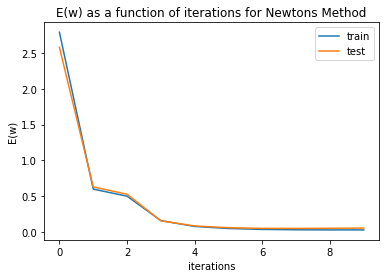

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))

plt.plot(E_vals_train, label = 'train')
plt.plot(E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Newtons Method')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

### Validating the hessian function

In [ ]:
def hess(x,y):
  hess_val = (((y*(1-y)) * x.T)@x)
  return hess_val

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([7,8])

In [ ]:
hess(x,y)

array([[ -546,  -756],
       [ -756, -1064]])

In [ ]:
2*(-21*np.array([[1,2],[3,4]]) - 28*np.array([[9,12],[12,16]]))

array([[ -546,  -756],
       [ -798, -1064]])

In [ ]:
hess_E
np.linalg.inv(hess_E)@hess_E

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# 5) Line search

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [ ]:
w_len = x_train.shape[1]
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.1
gamma = np.linspace(0,5,20)
tik = time.time()

for i in range(250):
  opt_list = []
  y_pred, E_val_train = E_value(x_train,y_train)
  E_vals_train.append(E_val_train)

  y_pred_test, E_val_test = E_value(x_test,y_test)
  E_vals_test.append(E_val_test)
  
  grad_E = - ((y_pred - y_train)@x_train)/x_train.shape[0]

  for j in gamma:
    wnew = w - j * grad_E
    y_pred_new = sigmoid( x_train @ wnew )
    grad_E_new = - ((y_pred_new - y_train)@x_train)/x_train.shape[0]
    opt_list.append(grad_E @ grad_E_new)
  
  near_idx, near_val = find_nearest(opt_list, 0)
  gamma_optimal = gamma[near_idx]
  w = w - gamma_optimal * grad_E

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

execution time: 65.677 seconds 

TRAINING DATA:
% incorrectly classified on training set: 1.18%
E value for training set = 0.039

TEST DATA:
% incorrectly classified on test set: 2.40%
E value for test set = 0.080


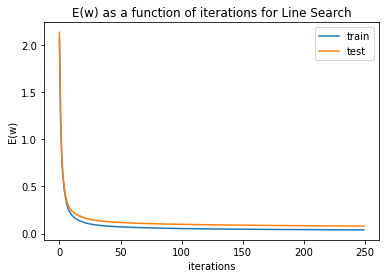

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))

plt.plot(E_vals_train, label = 'train')
plt.plot(E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Line Search')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

# 6) Conjugate gradient descent

In [ ]:
w_len = x_train.shape[1]
np.random.seed(5)
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.1
gamma = np.linspace(0,5,20)
dold = np.zeros(w_len)
tik = time.time()

for i in range(106):
  opt_list = []
  y_pred, E_val_train = E_value(x_train,y_train)
  E_vals_train.append(E_val_train)

  y_pred_test, E_val_test = E_value(x_test,y_test)
  E_vals_test.append(E_val_test)
  
  grad_E = - ((y_pred - y_train)@x_train)/x_train.shape[0]

# obtaining optimal value of gamma such that d0 . d1 = 0
  for j in gamma:
    wnew = w - j * grad_E
    y_pred_new = sigmoid( x_train @ wnew )
    grad_E_new = - ((y_pred_new - y_train)@x_train)/x_train.shape[0]
    opt_list.append(grad_E @ grad_E_new)

  near_idx, near_val = find_nearest(opt_list, 0)
  gamma_optimal = gamma[near_idx]

# calculate new gradient 
  wnew = w - gamma_optimal * grad_E
  y_pred_new = sigmoid( x_train @ wnew )
  grad_E_new = - ((y_pred_new - y_train)@x_train)/x_train.shape[0]

# calculate polak-ribiere with new and old gradient
  beta = ((grad_E_new - grad_E) @ grad_E_new ) / np.sum(grad_E**2)

# calculate new d using polar ribiere and old d
  d = - grad_E + beta * dold
  dold = d.copy()

# update weights with optimal gamma and new d
  w = w + gamma_optimal * d
  
y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


execution time: 29.274 seconds 

TRAINING DATA:
% incorrectly classified on training set: 1.55%
E value for training set = 0.055

TEST DATA:
% incorrectly classified on test set: 1.77%
E value for test set = 0.064


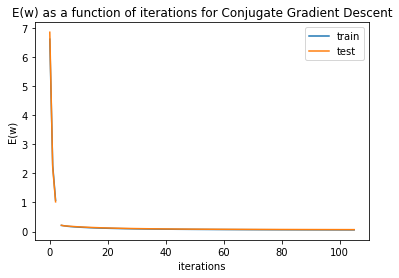

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))

plt.plot(E_vals_train, label = 'train')
plt.plot(E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Conjugate Gradient Descent')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()

# 7) Stochastic gradient descent

In [ ]:
w_len = x_train.shape[1]
w = np.random.randn(w_len)
E_vals_train = []
E_vals_test = []
eta = 0.1
tik = time.time()

for i in range(5000):
  idxs = np.random.randint(x_train.shape[0], size=round(x_train.shape[0]/100))
  x_train_batch = x_train[idxs,:]
  y_train_batch = y_train[idxs]
  y_pred, E_val_train = E_value(x_train_batch,y_train_batch)
  y_pred_train, E_val_train = E_value(x_train,y_train)
  E_vals_train.append(E_val_train)

  y_pred_test, E_val_test = E_value(x_test,y_test)
  E_vals_test.append(E_val_test)

  w = w - eta * (- ((y_pred - y_train_batch)@x_train_batch)/x_train_batch.shape[0])

y_pred, E_val_train = E_value(x_train,y_train)

y_pred = [round(y_pred[i]) for i in range(len(y_pred))]
y_pred_test = [round(y_pred_test[i]) for i in range(len(y_pred_test))]
timer = time.time()-tik

execution time: 45.659 seconds 

TRAINING DATA:
% incorrectly classified on training set: 1.53%
E value for training set = 0.054

TEST DATA:
% incorrectly classified on test set: 2.26%
E value for test set = 0.085


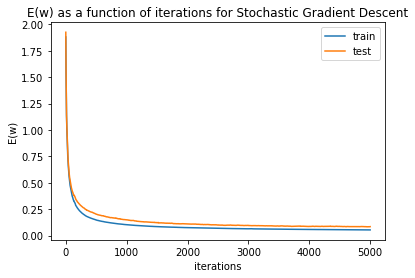

In [ ]:
print('execution time: {:.3f} seconds '.format(timer))

print('')
print('TRAINING DATA:')
error_rate = 1 - sum(y_pred == y_train)/x_train.shape[0]
print('% incorrectly classified on training set: {:.2f}%'.format(100*error_rate))
print('E value for training set = {:.3f}'.format(E_vals_train[-1]))

print('')
print('TEST DATA:')
error_rate = 1 - sum(y_pred_test == y_test)/x_test.shape[0]
print('% incorrectly classified on test set: {:.2f}%'.format(100*error_rate))
print('E value for test set = {:.3f}'.format(E_vals_test[-1]))

plt.plot(E_vals_train, label = 'train')
plt.plot(E_vals_test, label = 'test')
plt.title('E(w) as a function of iterations for Stochastic Gradient Descent')
plt.xlabel('iterations')
plt.ylabel('E(w)')
plt.legend()
plt.show()